# Evaluation Project 2 : Avacado Project

**Project Description:**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

**Some relevant columns in the dataset:**

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

**To Predict : Label**


In [1]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset:

avacado=pd.read_csv("avocado.csv")
avacado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# To Display top 5 rows :
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA Analysis:

In [4]:
# Checking Total Numbers of Rows and Column:
avacado.shape

(18249, 14)

**There are 18249 rows , and 14 columns present in Dataset.**

In [5]:
# To display all the columns:
avacado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
# To find the Datatypes of all the columns:
avacado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**In this dataset , int64 , float64 ,object datatypes are present.**

In [7]:
# Finding the null values:

avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Great, There are no null values. We can go ahead.**

<AxesSubplot:>

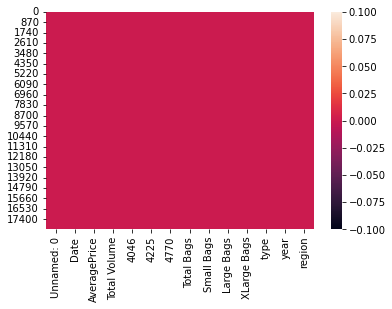

In [8]:
# Visualizing the null values  ,to verify:
sns.heatmap(avacado.isnull())

In [9]:
# To get the  brief information of dataset:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Now , we have to predict the target variable . Let's analyse the target variable 'AveragePrice'.**

In [10]:
# To find the unique values in Target Variable :
avacado['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [11]:
# To find the number of unique values in dataset:
avacado['AveragePrice'].nunique()

259

**There are 259 unique values in the Target Variable "AveragePrice".**

In [12]:
# To find the value count in Target Variable:
avacado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

# Data Cleaning:

In [13]:
# Let's drop Irrelevent Columns:

avacado=avacado.drop(columns="Unnamed: 0", axis=1)

In [14]:
#Also Column 'Date' have no any relation with our Target Column. So, we will drop this column.

avacado=avacado.drop(columns="Date", axis=1)

In [15]:
# To verify:

avacado.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [16]:
# Let's have the descriptive statistics of continuous data:

avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


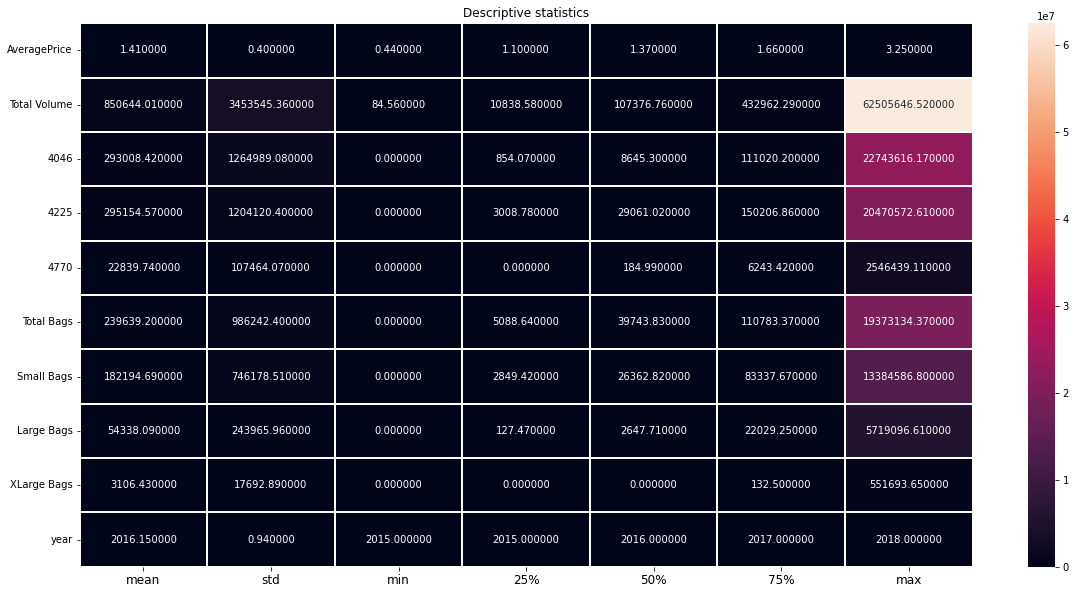

In [17]:
# To visualize the Descriptive Statistics:

plt.figure(figsize=(20,10))
sns.heatmap(round(avacado.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('Descriptive statistics')
plt.show()

# Data Visualization:

**Univariate Analysis:**

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

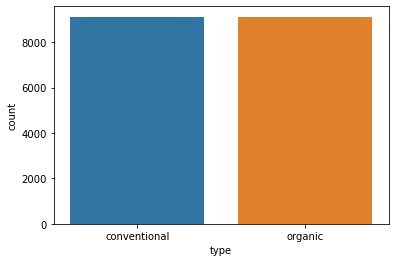

In [18]:
print(avacado['type'].value_counts())
sns.countplot('type',data=avacado)

**Here ,we can see that total number of conventional avacado sold is 9126 and the total number of organic avacado sold is 9123.**



2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

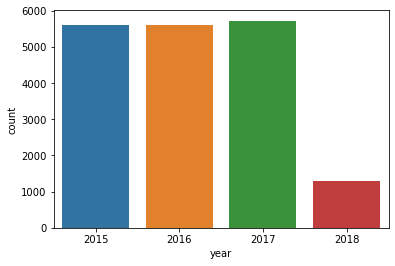

In [19]:
#Countplot for "year" column
print(avacado['year'].value_counts())
sns.countplot('year',data=avacado)

In [20]:
#Countplot for "region" column
print(avacado['region'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:xlabel='count', ylabel='region'>

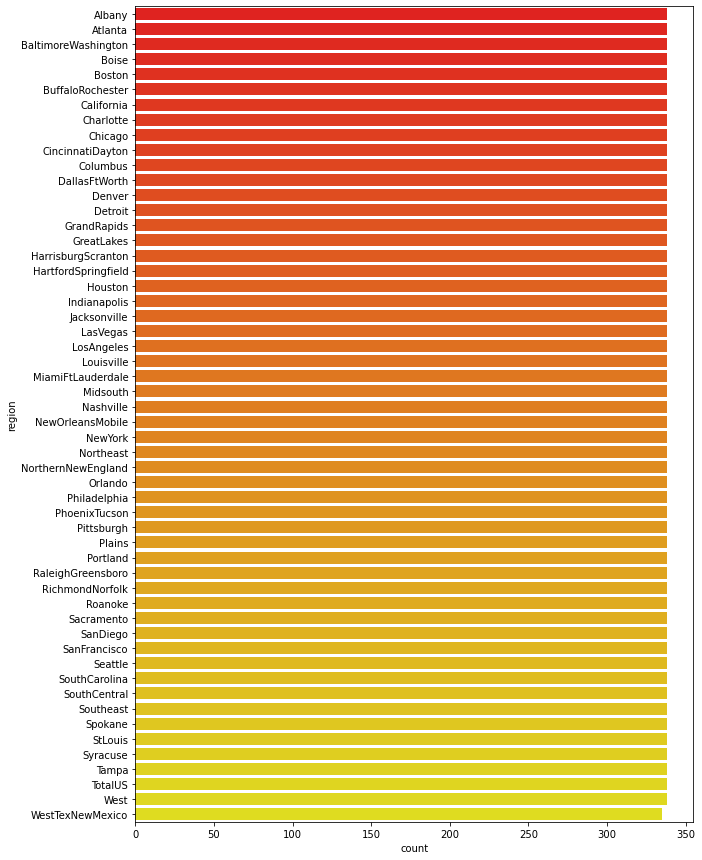

In [21]:
plt.figure(figsize=(10,15))
sns.countplot(y='region', data=avacado, palette='autumn')

**Normal Distribution Curve:**

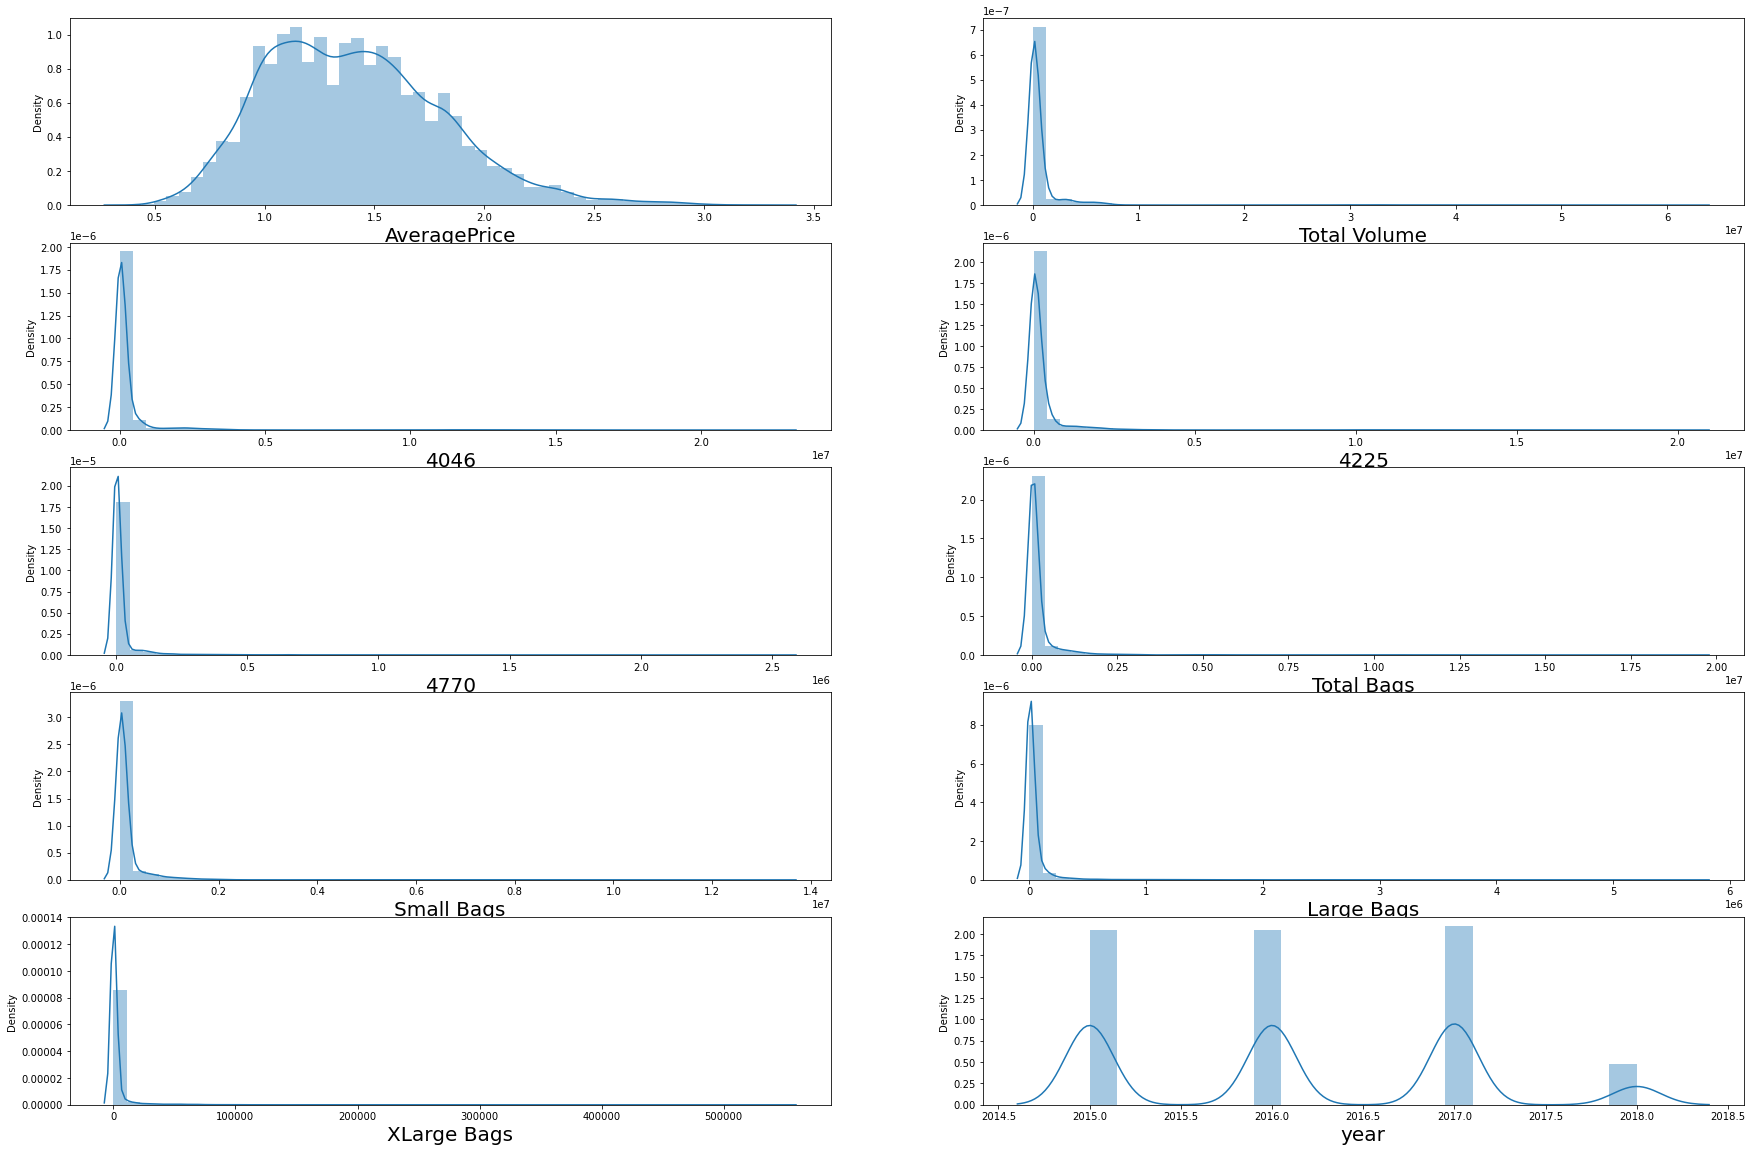

In [22]:
columns=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']
plt.figure(figsize=(30,20))
plotnumber = 1

for column in avacado[columns]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(avacado[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Here , we observe that all the columns have some skewness present , and these are not normally distributed.**

**Bivariate Analysis: Let's Compare each column with the target variable**

In [23]:
#Scatterplot for comparision between "Total Volume" and "AveragePrice" column
print(avacado['Total Volume'].value_counts())

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

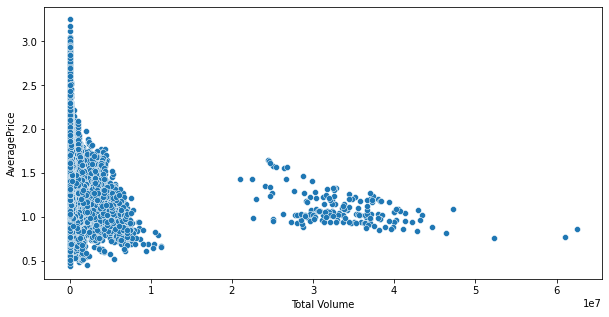

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=avacado)

In [25]:
#Scatterplot for comparision between "4046" and "AveragePrice" column
print(avacado['4046'].value_counts())

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

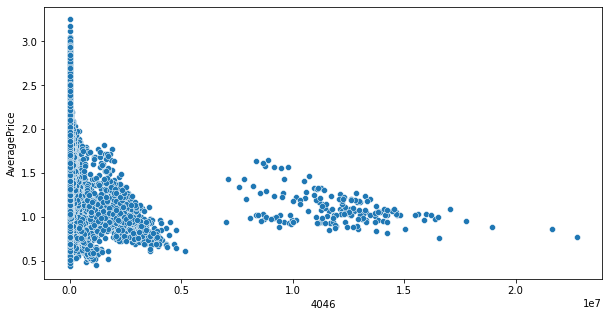

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='4046', y='AveragePrice', data=avacado)

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

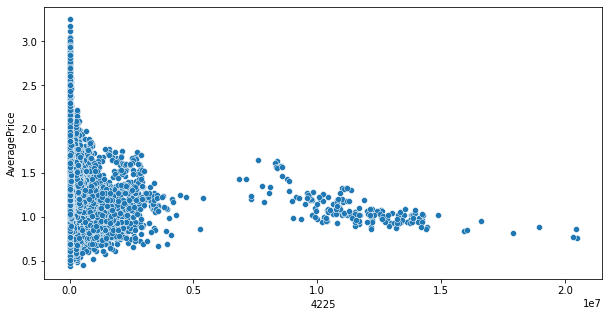

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='4225', y='AveragePrice', data=avacado)

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

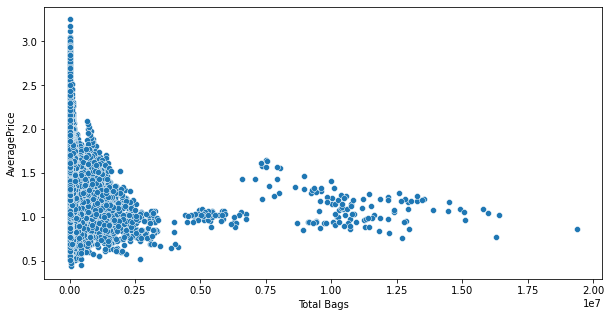

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Bags', y='AveragePrice', data=avacado)

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

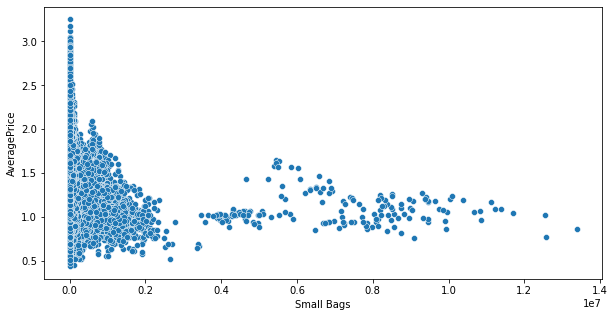

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Small Bags', y='AveragePrice', data=avacado)

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

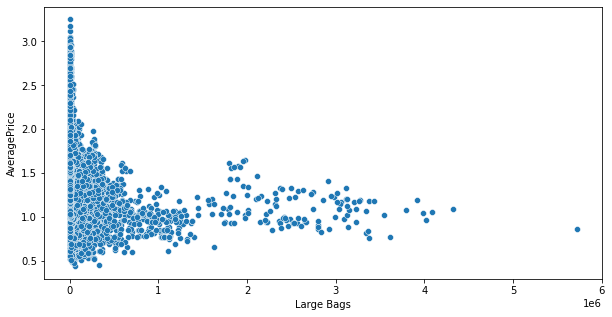

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Large Bags', y='AveragePrice', data=avacado)

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

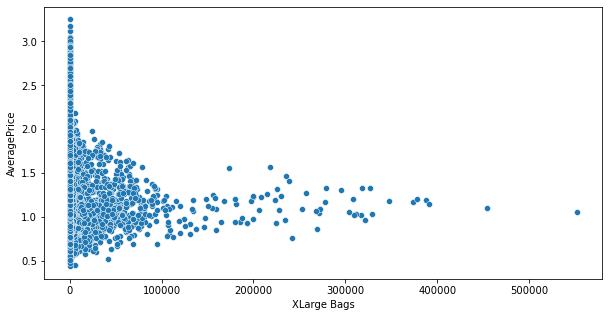

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='XLarge Bags', y='AveragePrice', data=avacado)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

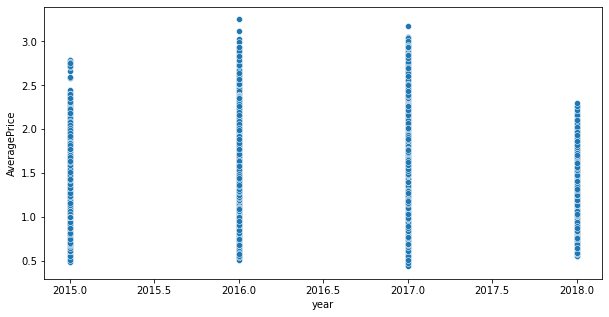

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='year', y='AveragePrice', data=avacado)

**Multivariate Analysis:**

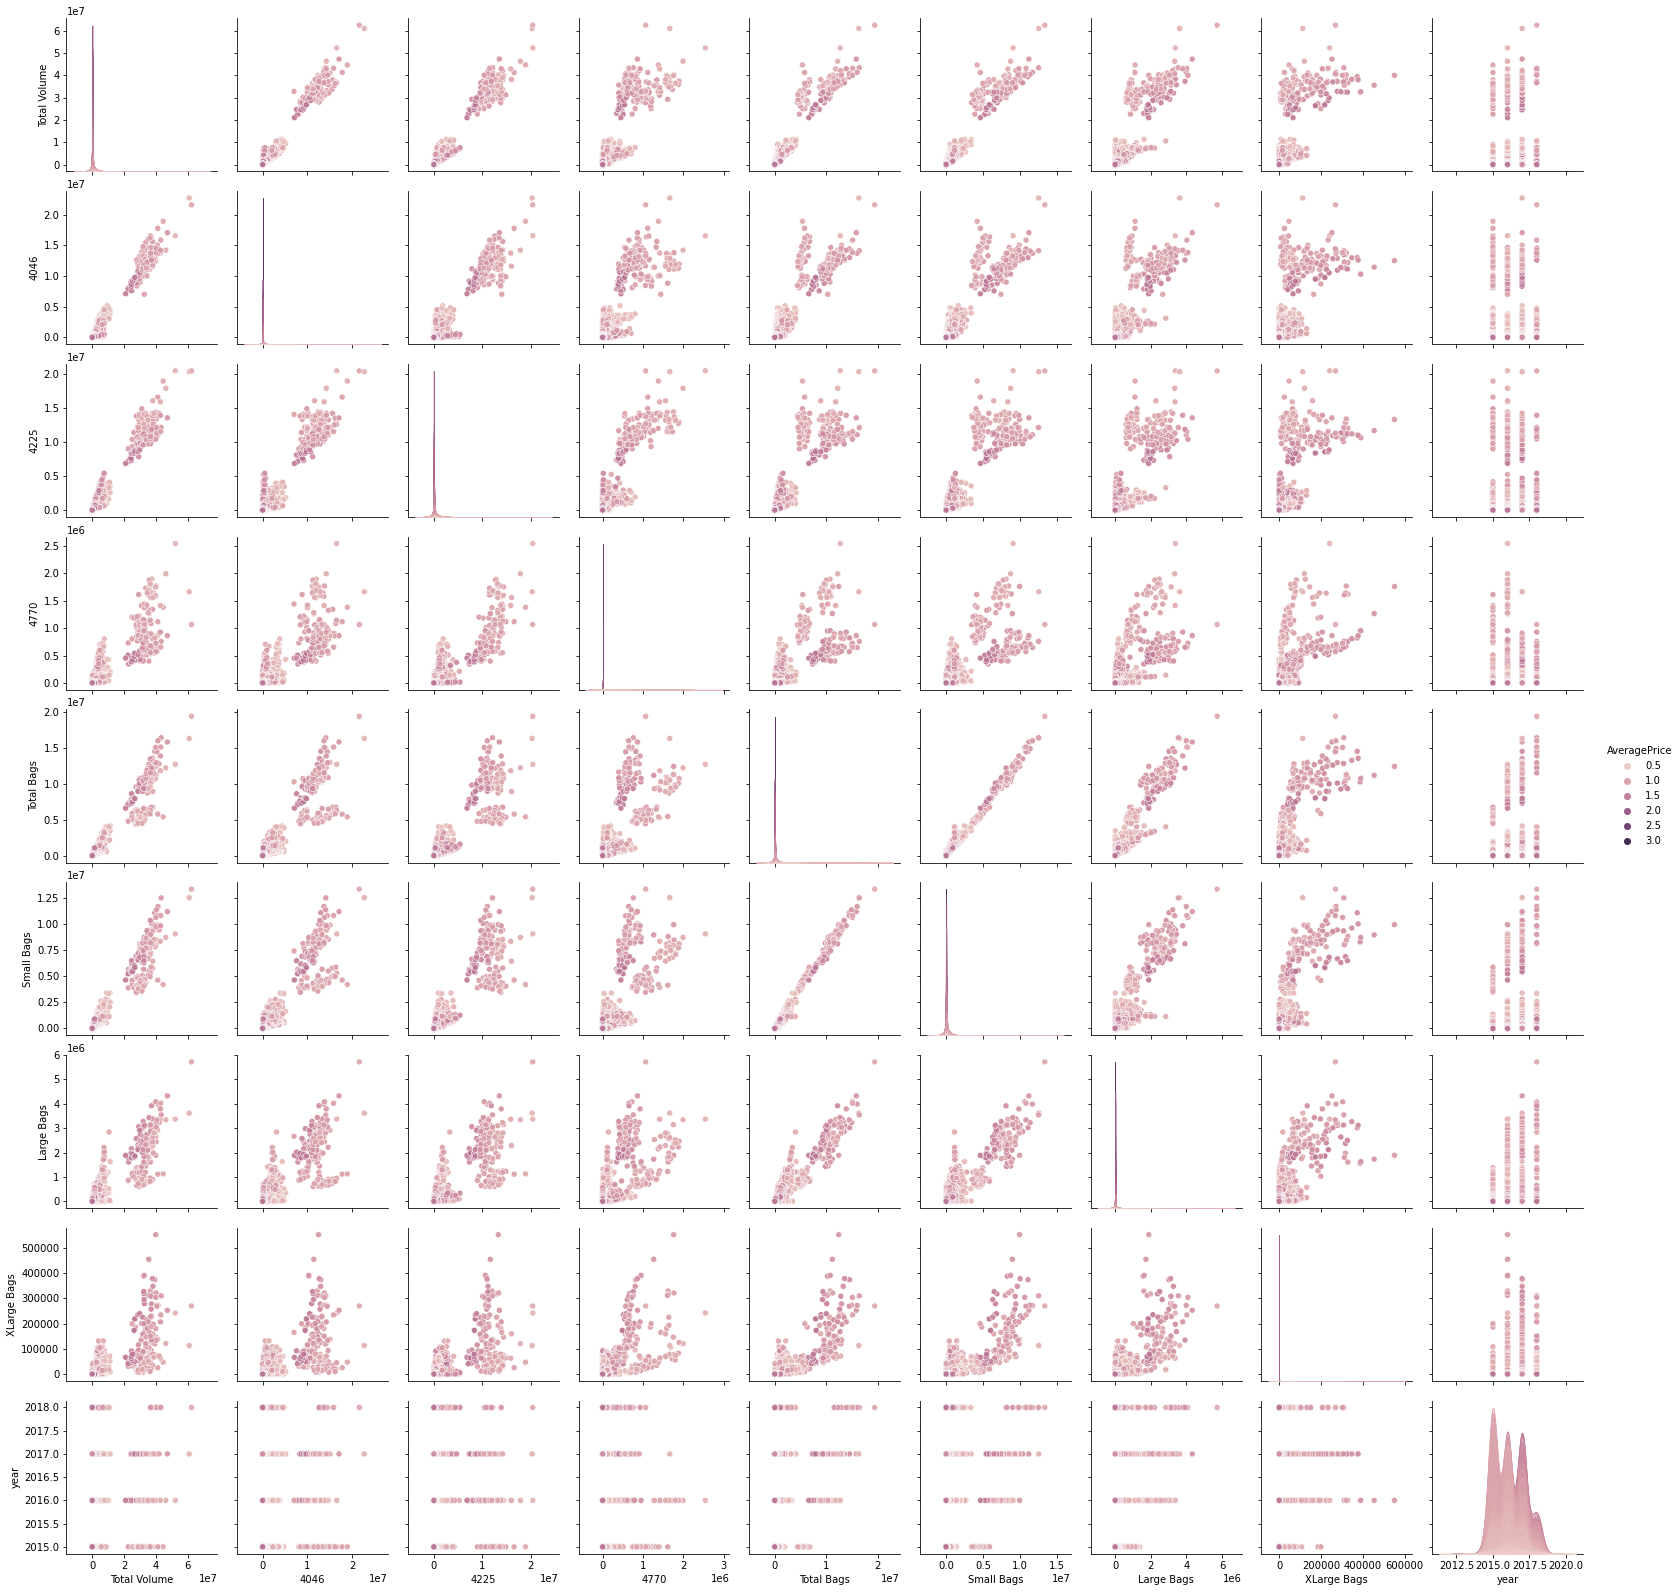

In [33]:
sns.pairplot(data=avacado,hue="AveragePrice")

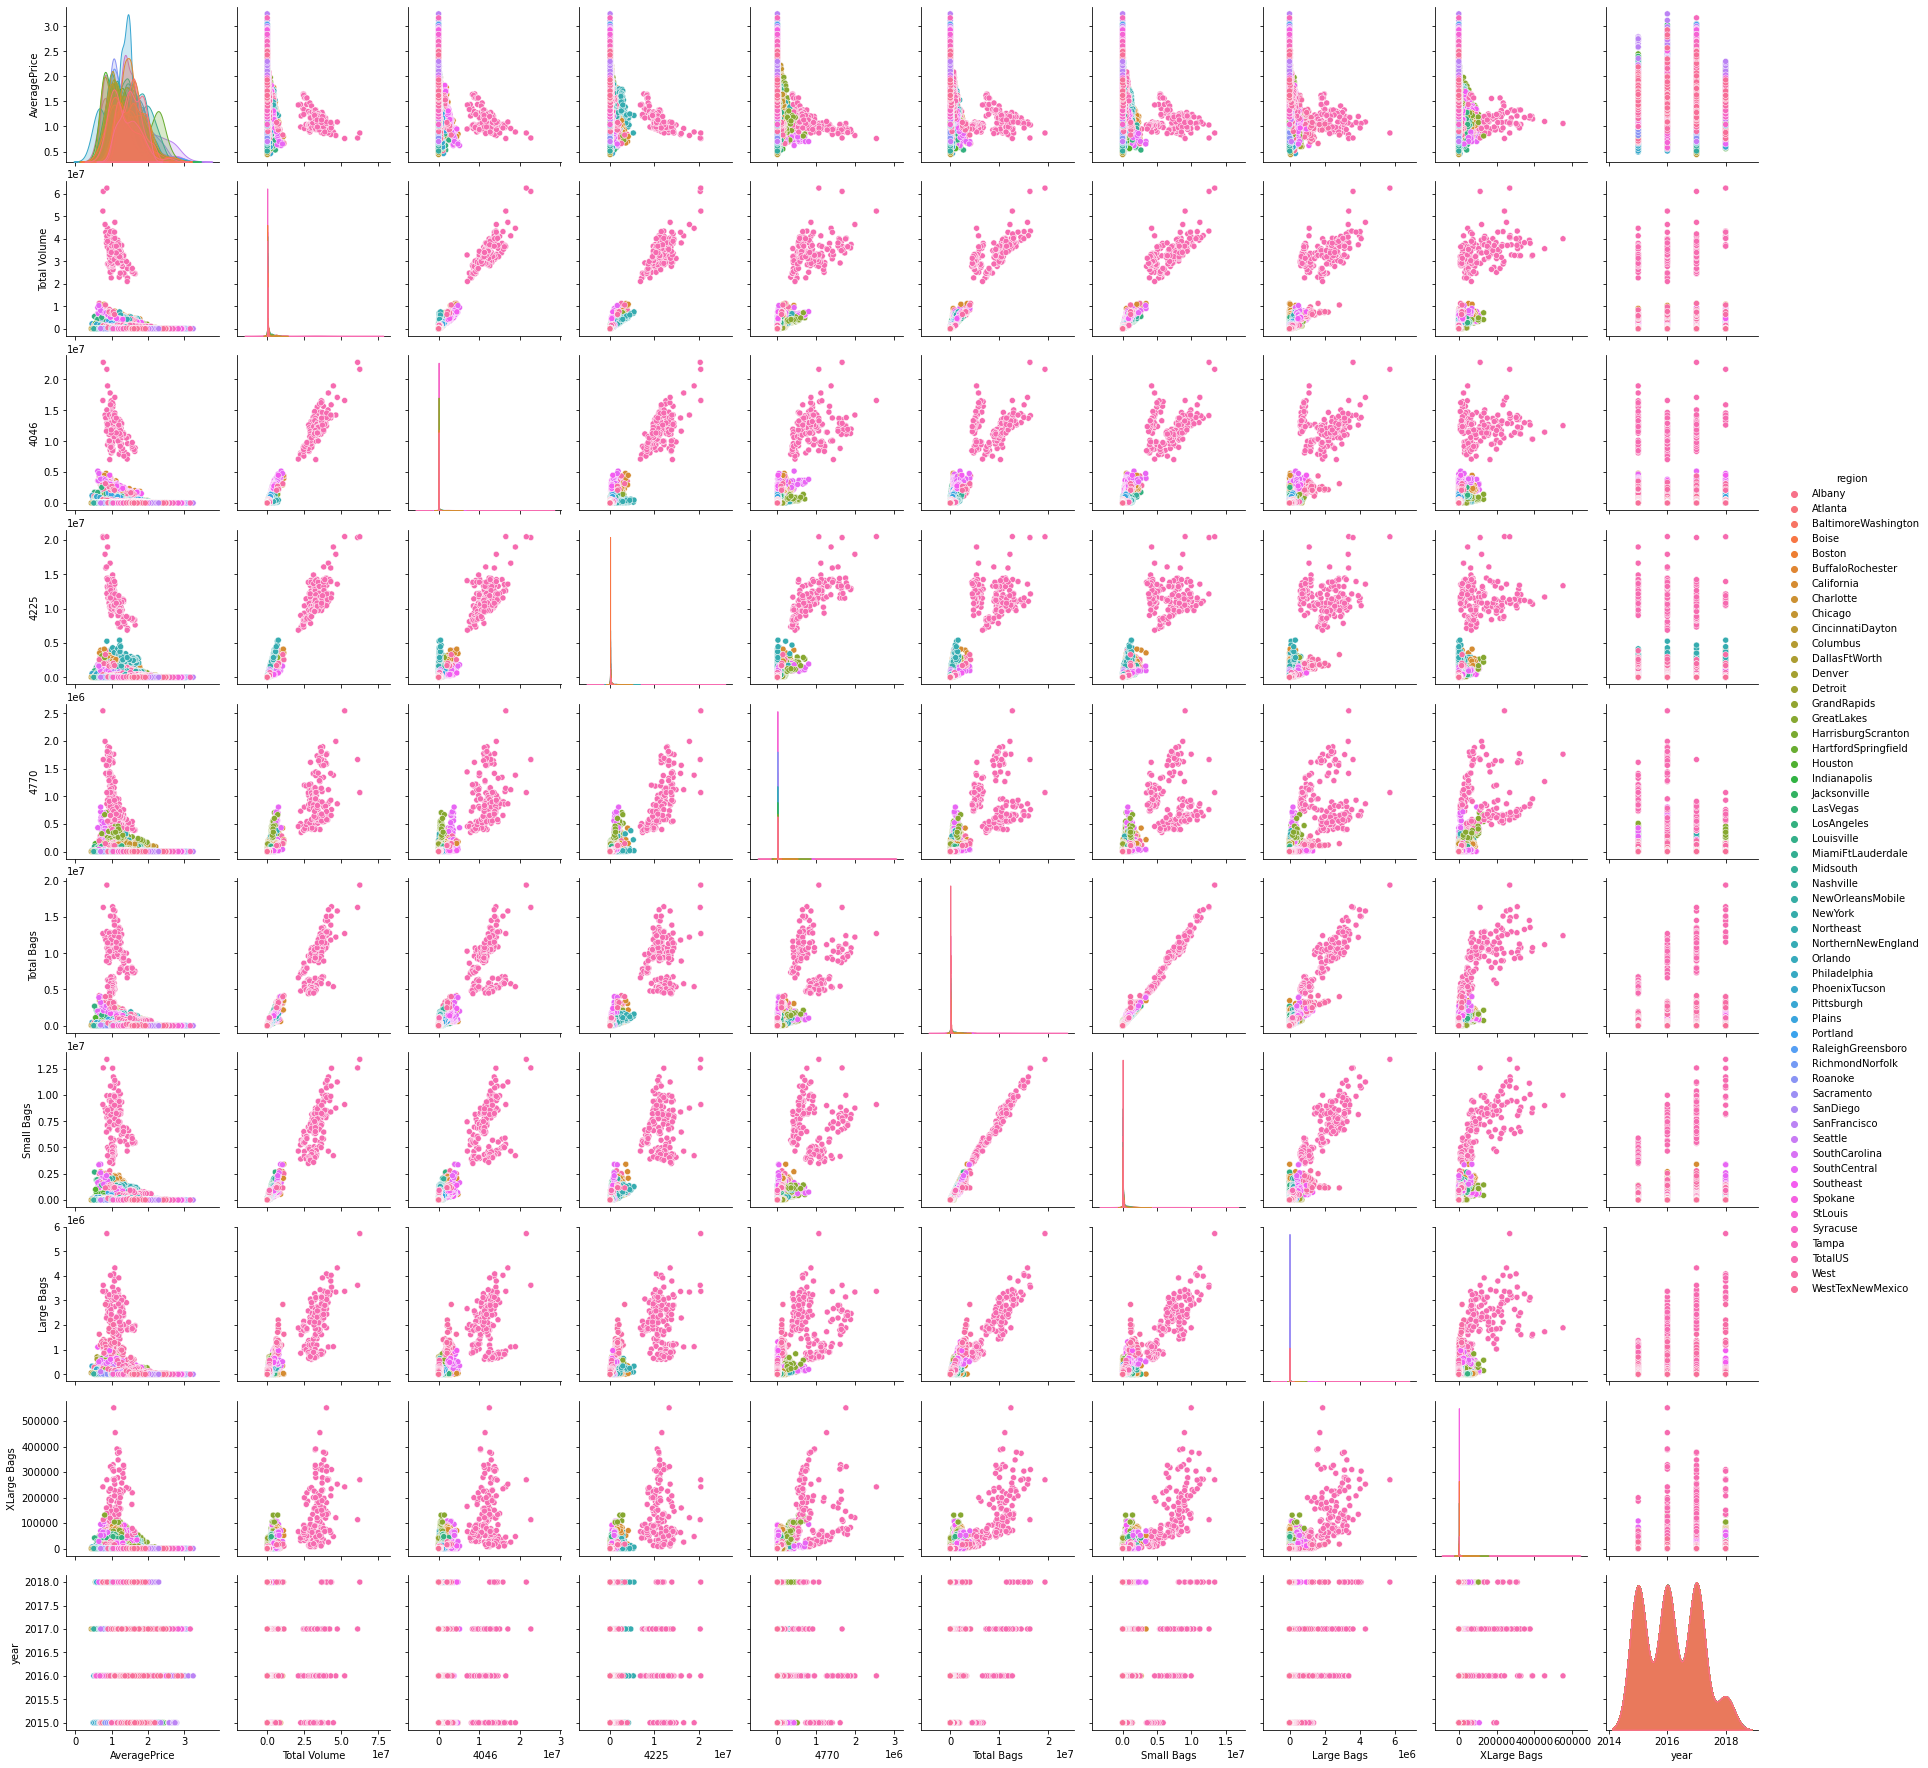

In [34]:
sns.pairplot(data=avacado,hue="region")

# Correlation:

In [35]:
avacado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [36]:
# Let's have the correlation of columns with the target variable Average price:

avacado.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

**Here , we can see that the columns 4046 is least correlated with the Target Variable AveragePrice and column year is highly correlated with the target variable .**

<AxesSubplot:>

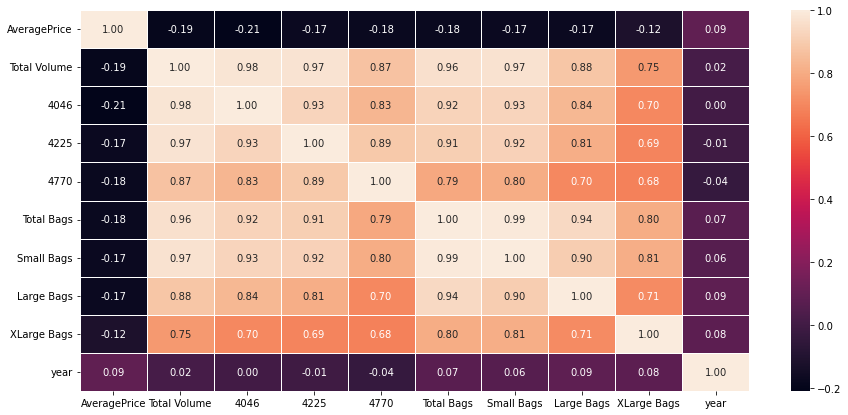

In [37]:
# To visualize the Correlation:
plt.figure(figsize=(15,7))
sns.heatmap(avacado.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

# Label Encoding:


**As we observed that , there are some columns present with object datatype . So we have to convert these datatype into numeric format , so that model can understand and predict.**

In [38]:
# To initialize the LabelEncoder:

encoder=LabelEncoder()

**There are two columns which have object datatype i.e "type" and "Region".**

In [39]:
avacado["type"] = encoder.fit_transform(avacado[["type"]])
avacado["region"] =encoder.fit_transform(avacado[["region"]])

In [40]:
# To verify , if the values of these columns converted into numeric format or not:
avacado["type"].unique()

array([0, 1])

In [41]:
avacado["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

**Great , Values of these columns tranformed into numeric format.**

In [42]:
avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [43]:
# Now let's again check for correlation:
avacado.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [44]:
avacado.corr()["region"].sort_values()

AveragePrice   -0.011716
type           -0.000280
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

# Outliers Detection:

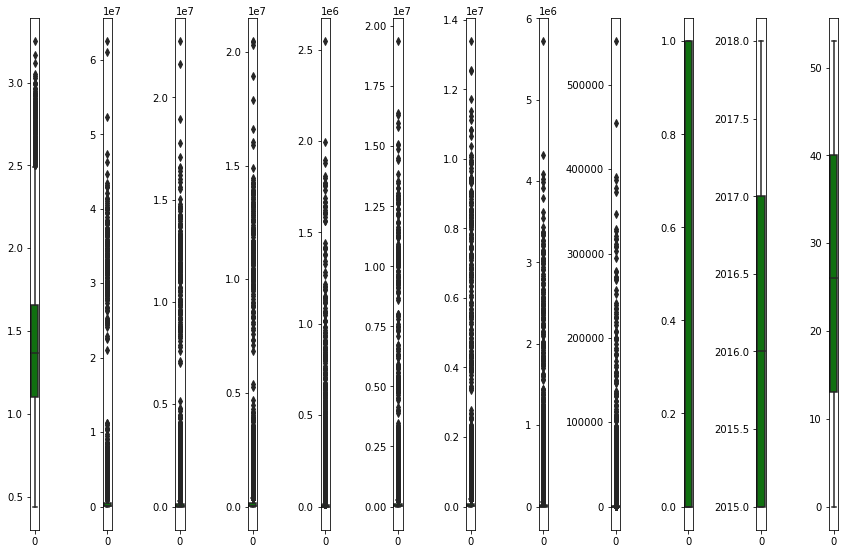

In [45]:
columns=avacado.columns.values
ncol=30
nrows=12
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(columns)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=avacado[columns[i]],color='green',orient='v')
    plt.tight_layout()

**Observations:**

**1. Outliers are present in all the continuos  columns including AveragePrice.**

**2. Outliers are not present in any of the Categorical columns.**

In [46]:
# To remove Outliers using Z score method:
outliers = avacado[[ 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

z=np.abs(zscore(outliers))

In [47]:
# Creating new dataframe for regression

avacado_ = avacado[(z<3).all(axis=1)]
avacado_.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [48]:
z.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558


In [49]:
# To verify :
avacado_.shape

(17782, 12)

In [50]:
# To find the number of dropped rows:
avacado.shape[0]-avacado_.shape[0]

467

In [51]:
# To find the loss percentage:
loss=(18249-17782)/18249*100
print(loss,"%")

2.55904433119623 %


In [52]:
# Let's do the same for another target variable i.e "Region"

In [53]:
outliers_ = avacado[[ 'AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

z1=np.abs(zscore(outliers_))

In [54]:
# Creating new dataframe for classification
avacado__ = avacado[(z1<3).all(axis=1)]
avacado__.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [55]:
z1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558


In [56]:
avacado__.shape

(17651, 12)

In [57]:
avacado.shape[0]-avacado__.shape[0]

598

In [58]:
loss_percent=(18249-17651)/18249*100
print(loss_percent,"%")

3.276891884486821 %


In [59]:
# Removing outliers using IQR (Inter Quantile Range) method for Target Column "Average Price:

In [60]:
#1st quantile
Q1=outliers.quantile(0.25)

# 3rd quantile
Q3=outliers.quantile(0.75)

#IQR
IQR=Q3 - Q1
avacado2=avacado[~((avacado < (Q1 - 1.5 * IQR)) |(avacado > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
avacado2.shape

(11747, 12)

In [62]:
avacado.shape[0]-avacado2.shape[0]

6502

In [63]:
loss_perc = (18249-11747)/18249*100
loss_perc

35.62934955340019

In [64]:
# removing outliers QR (Inter Quantile Range) method for Target Column "region":

In [65]:
#1st quantile
Q1=outliers.quantile(0.25)

# 3rd quantile
Q3=outliers.quantile(0.75)

#IQR
IQR=Q3 - Q1
avacado3=avacado[~((avacado < (Q1 - 1.5 * IQR)) |(avacado > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
avacado3.shape

(11747, 12)

In [67]:
avacado.shape[0]-avacado3.shape[0]

6502

**We will consider Z score method to remove outliers.As there is less data loss.**

In [68]:
# Checking for skewness for "AveragePrice":
avacado_.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [69]:
#Checking for skewness for Target Column "region"
avacado__.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

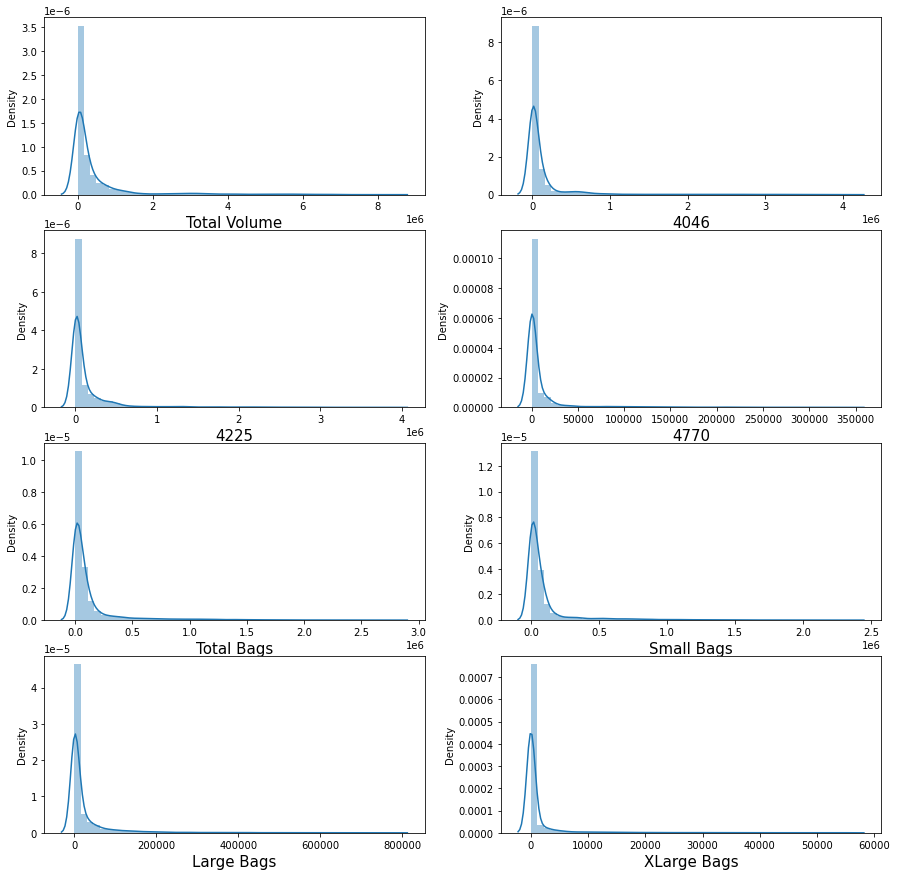

In [70]:
#For AveragePrice:

columns=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in avacado_[columns]:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(avacado_[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

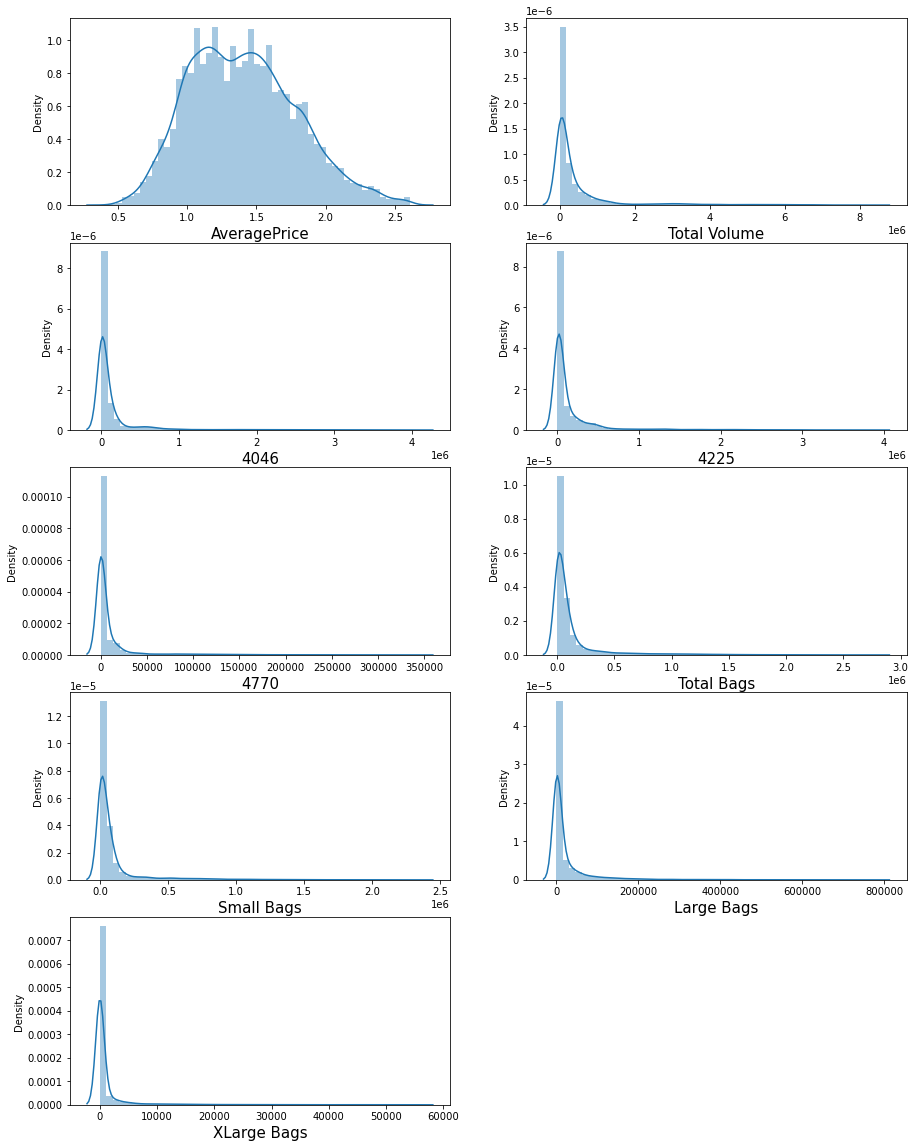

In [71]:
#For Region Columns:
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,20))
plotnumber = 1

for column in avacado__[collist]:
    if plotnumber<=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(avacado__[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

**Still , there is skewness present in all the columns. Let's remove skewness using yeo-johnson method.**

In [72]:
# For target variable "Average price"

columns=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

avacado_[columns]=power_transform(avacado_[columns],method='yeo-johnson')
avacado_[columns]

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702
...,...,...,...,...,...,...,...,...
18244,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702
18245,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702
18246,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702
18247,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702


In [73]:
# for target variable "Region":

columns_=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

avacado__[columns_]=power_transform(avacado__[columns_],method='yeo-johnson')
avacado__[columns_]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...,...
18244,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
18245,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
18246,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
18247,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


In [74]:
# To verify the skewness:
avacado_.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [75]:
avacado__.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

**Great , skewness is almost removed from almost all the columns. We can go ahead.**

# Data Preprocessing:

**Splitting the Training Testing Dataset:**

In [76]:
x=avacado_.drop("AveragePrice",axis=1)
y=avacado_["AveragePrice"]

In [77]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0


In [78]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [79]:
x.shape

(17782, 11)

In [80]:
y.shape

(17782,)

In [81]:
# For Target variable "Region":

x1=avacado_.drop("region",axis=1)
y1=avacado_["region"]

In [82]:
x1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015


In [83]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [84]:
x1.shape

(17782, 11)

In [85]:
y1.shape

(17782,)

In [86]:
# let's remove all features which variance doesn't meet some threshol using "Variance Threshold Method":
# By default, it removes all zero-variance features.

In [87]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [88]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [89]:
# For Target Variable "AveragePrice":
x.columns[var_threshold.get_support()]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [90]:
# For Target Variable "Region":
x1.columns[var_threshold.get_support()]

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

**Here we observed that no columns is removed , it means all the columns are equally important.**

In [91]:
# Splitting the Dataset:

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=72)

In [93]:
x.shape

(17782, 11)

In [94]:
 y.shape

(17782,)

In [95]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 11), (12447,), (5335, 11), (5335,))

# Model Selection:

**1. Linear Regression:**

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.5275980663980266
Mean abs error:  0.21386390231945346
Mean squared error:  0.075976097325695
Root Mean Squared Error:  0.2756376195763107


**2.Random forest Regression Model**

In [97]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8524867187023399
Mean abs error:  0.10834383317713221
Mean squared error:  0.02372446558643135
Root Mean Squared Error:  0.1540274832178704


**3. KNN regressor**

In [98]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.8264349566800967
Mean abs error:  0.12071894199729251
Mean squared error:  0.027914353616346747
Root Mean Squared Error:  0.1670758917867768


**4.Gradient Boosting Regressor**

In [99]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7677986622229639
Mean abs error:  0.14245494083960852
Mean squared error:  0.03734479091478254
Root Mean Squared Error:  0.1932480036501866


In [100]:
# Let's Check cross validation score :

In [101]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x,y,cv=5).mean())


The CV score  for Linear_regression is : 0.19214888051251588


In [102]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())


The CV  score for  the Random forest regressor is: 0.2880046600122158


In [103]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())


The CV score  for  the KNN regressor is : 0.03760086530167488


In [104]:
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x,y,cv=5).mean())

The CV score  for  the GBR regressor is : 0.3918993376562958


# Hyperparameter Tuning:

In [105]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [106]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [107]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=60)

In [108]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

85.24867187023399


In [109]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Avacado_Regressor = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Avacado_Regressor

,Original,Predicted
0,1.54,1.178279
1,1.08,1.071765
2,1.15,1.206412
3,1.45,1.677024
4,2.34,2.400870
...,...,...
5330,1.59,1.832583
5331,1.83,1.639850
5332,1.35,1.516540
5333,1.70,1.560845


**Splitting for Target Variable "Region".**

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=71)

In [111]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 11), (12447,), (5335, 11), (5335,))

**Model Selection:**

**1.Decision Tree Classifier:**

In [112]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8
confusion_matrix: 
 [[84  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  2]
 [ 0  0 89 ...  0  0  2]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  3 ...  0  0 71]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       112
           1       0.72      0.71      0.71       107
           2       0.86      0.86      0.86       103
           3       0.86      0.82      0.84       106
           4       0.85      0.91      0.88       104
           5       0.77      0.74      0.75       110
           6       0.95      0.93      0.94        99
           7       0.80      0.77      0.78       104
           8       0.94      0.92      0.93       107
           9       0.81      0.89      0.85       113
          10       0.79      0.66      0.72        97
          11       0.85      0.85      0.85       112
          12       0.79      0.77      0.78        97
          13       0.

**2.Random Forest Classifier:**

In [113]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.9087160262417995
confusion_matrix: 
 [[102   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   0]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  70   0]
 [  0   1   1 ...   0   0  96]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       112
           1       0.87      0.88      0.87       107
           2       0.96      0.98      0.97       103
           3       0.98      0.86      0.91       106
           4       0.96      0.95      0.96       104
           5       0.87      0.81      0.84       110
           6       0.97      0.95      0.96        99
           7       0.91      0.89      0.90       104
           8       0.99      0.98      0.99       107
           9       0.92      0.89      0.91       113
          10       0.90      0.92      0.91        97
          11       0.92      0.98      0.95       112
          12       0.94 

**Hyperparameter tuning:**

In [114]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = 42)

In [116]:
rfc=RandomForestClassifier(random_state=42)

In [120]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [123]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [126]:
ava_region = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')


In [127]:
ava_region.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=50)

In [128]:
pred = ava_region.predict(x_test)

In [129]:
acc=accuracy_score(y_test,pred)
print(acc*100)

68.56607310215558


**Conclusion:** 

**1.For Target Variable "AveragePrice" , we get the 85% of accuracy using Random Forest Regressor.**

**2. For Target Variable "Region" , we get the 68 % of accuracy using Random Forest Classifier.**

**3. Among both of these Target Variable , AveragePrice giving more accuracy than that of Region Target Variable.**